<center class="half">
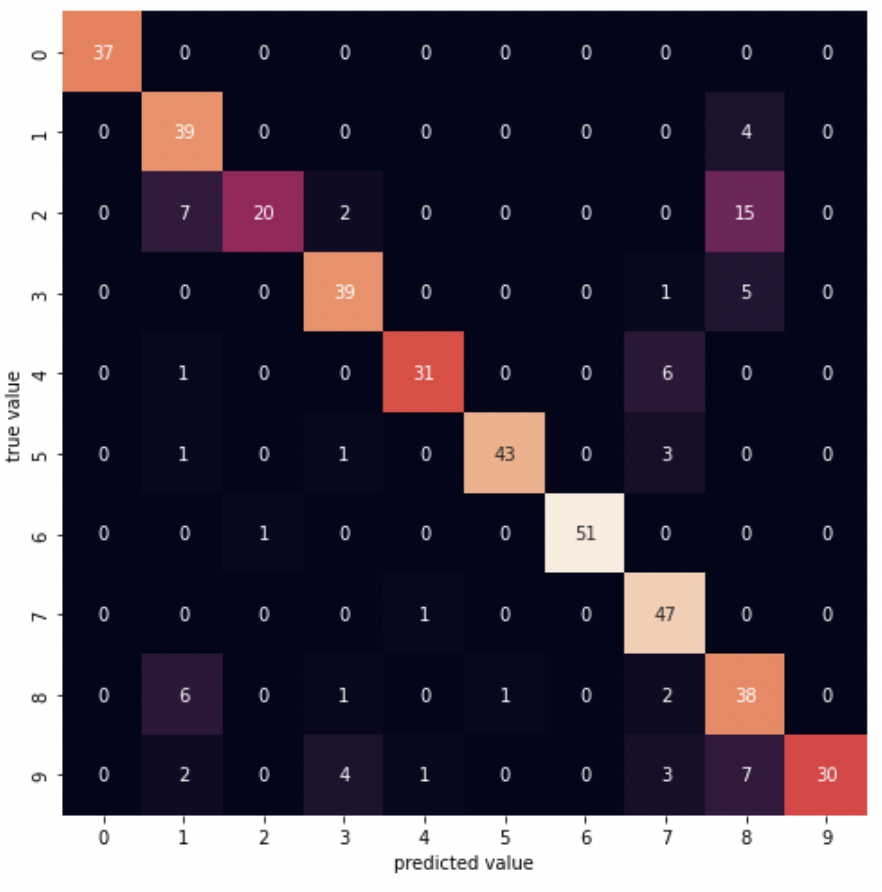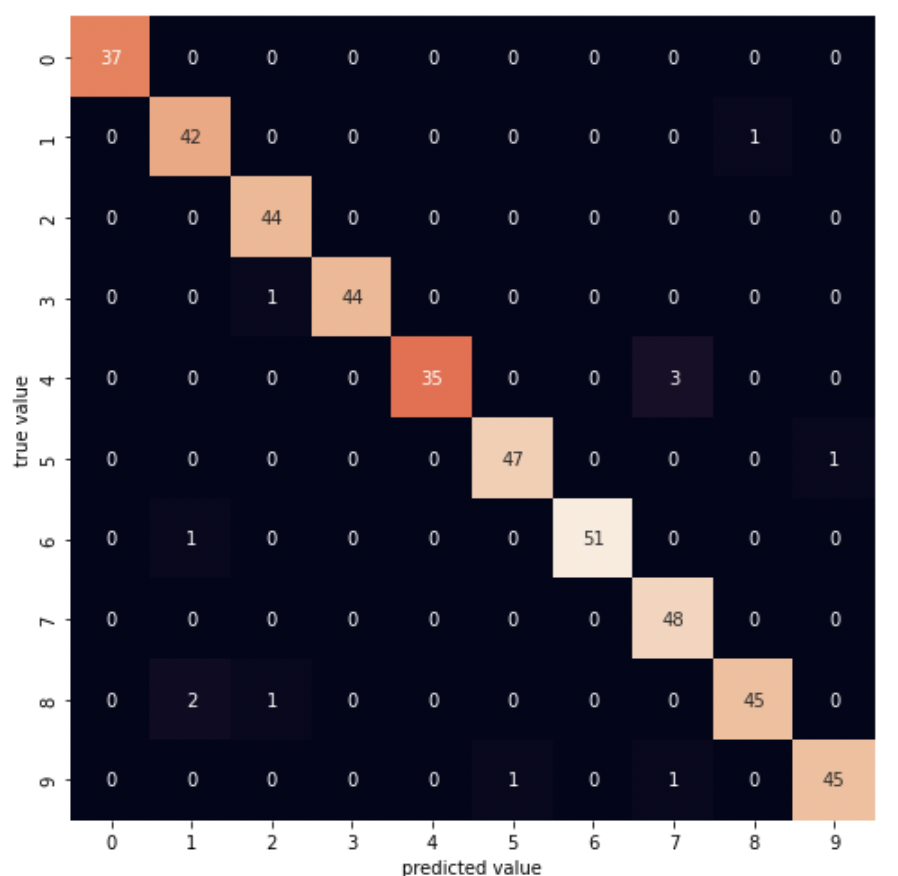<img\ src="attachment:image-4.png" width="400">
</center>

# 3.1 Scikit-Learn高斯朴素贝叶斯

### 3.1.1 加载并可视化手写数字

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits()
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[1:2,:,:]

array([[[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

共有1797个样本，每张图片都是8像素*8像素

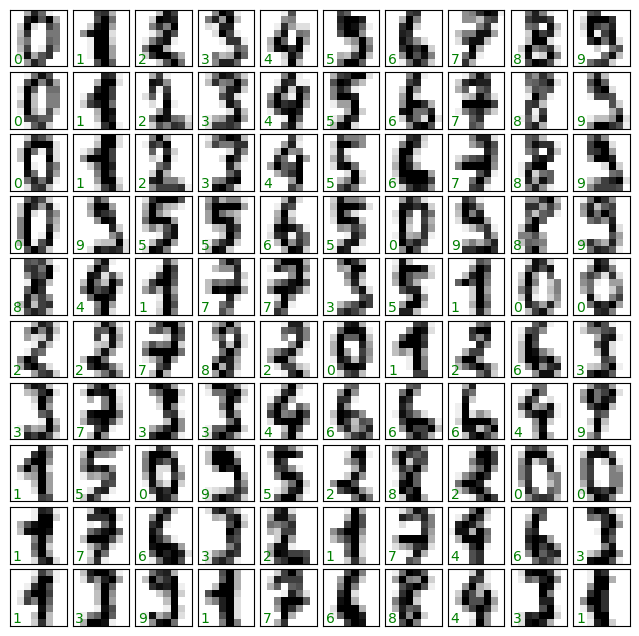

In [5]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

### 3.1.2 无监督学习：降维

In [6]:
X=digits.data
X.shape

(1797, 64)

In [7]:
y=digits.target
y.shape

(1797,)

In [8]:
from sklearn.manifold import Isomap#流形学习算法中的ISOMAP(等距特征映射)算法
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

G:\anaconda\envs\chatbot\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
G:\anaconda\envs\chatbot\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

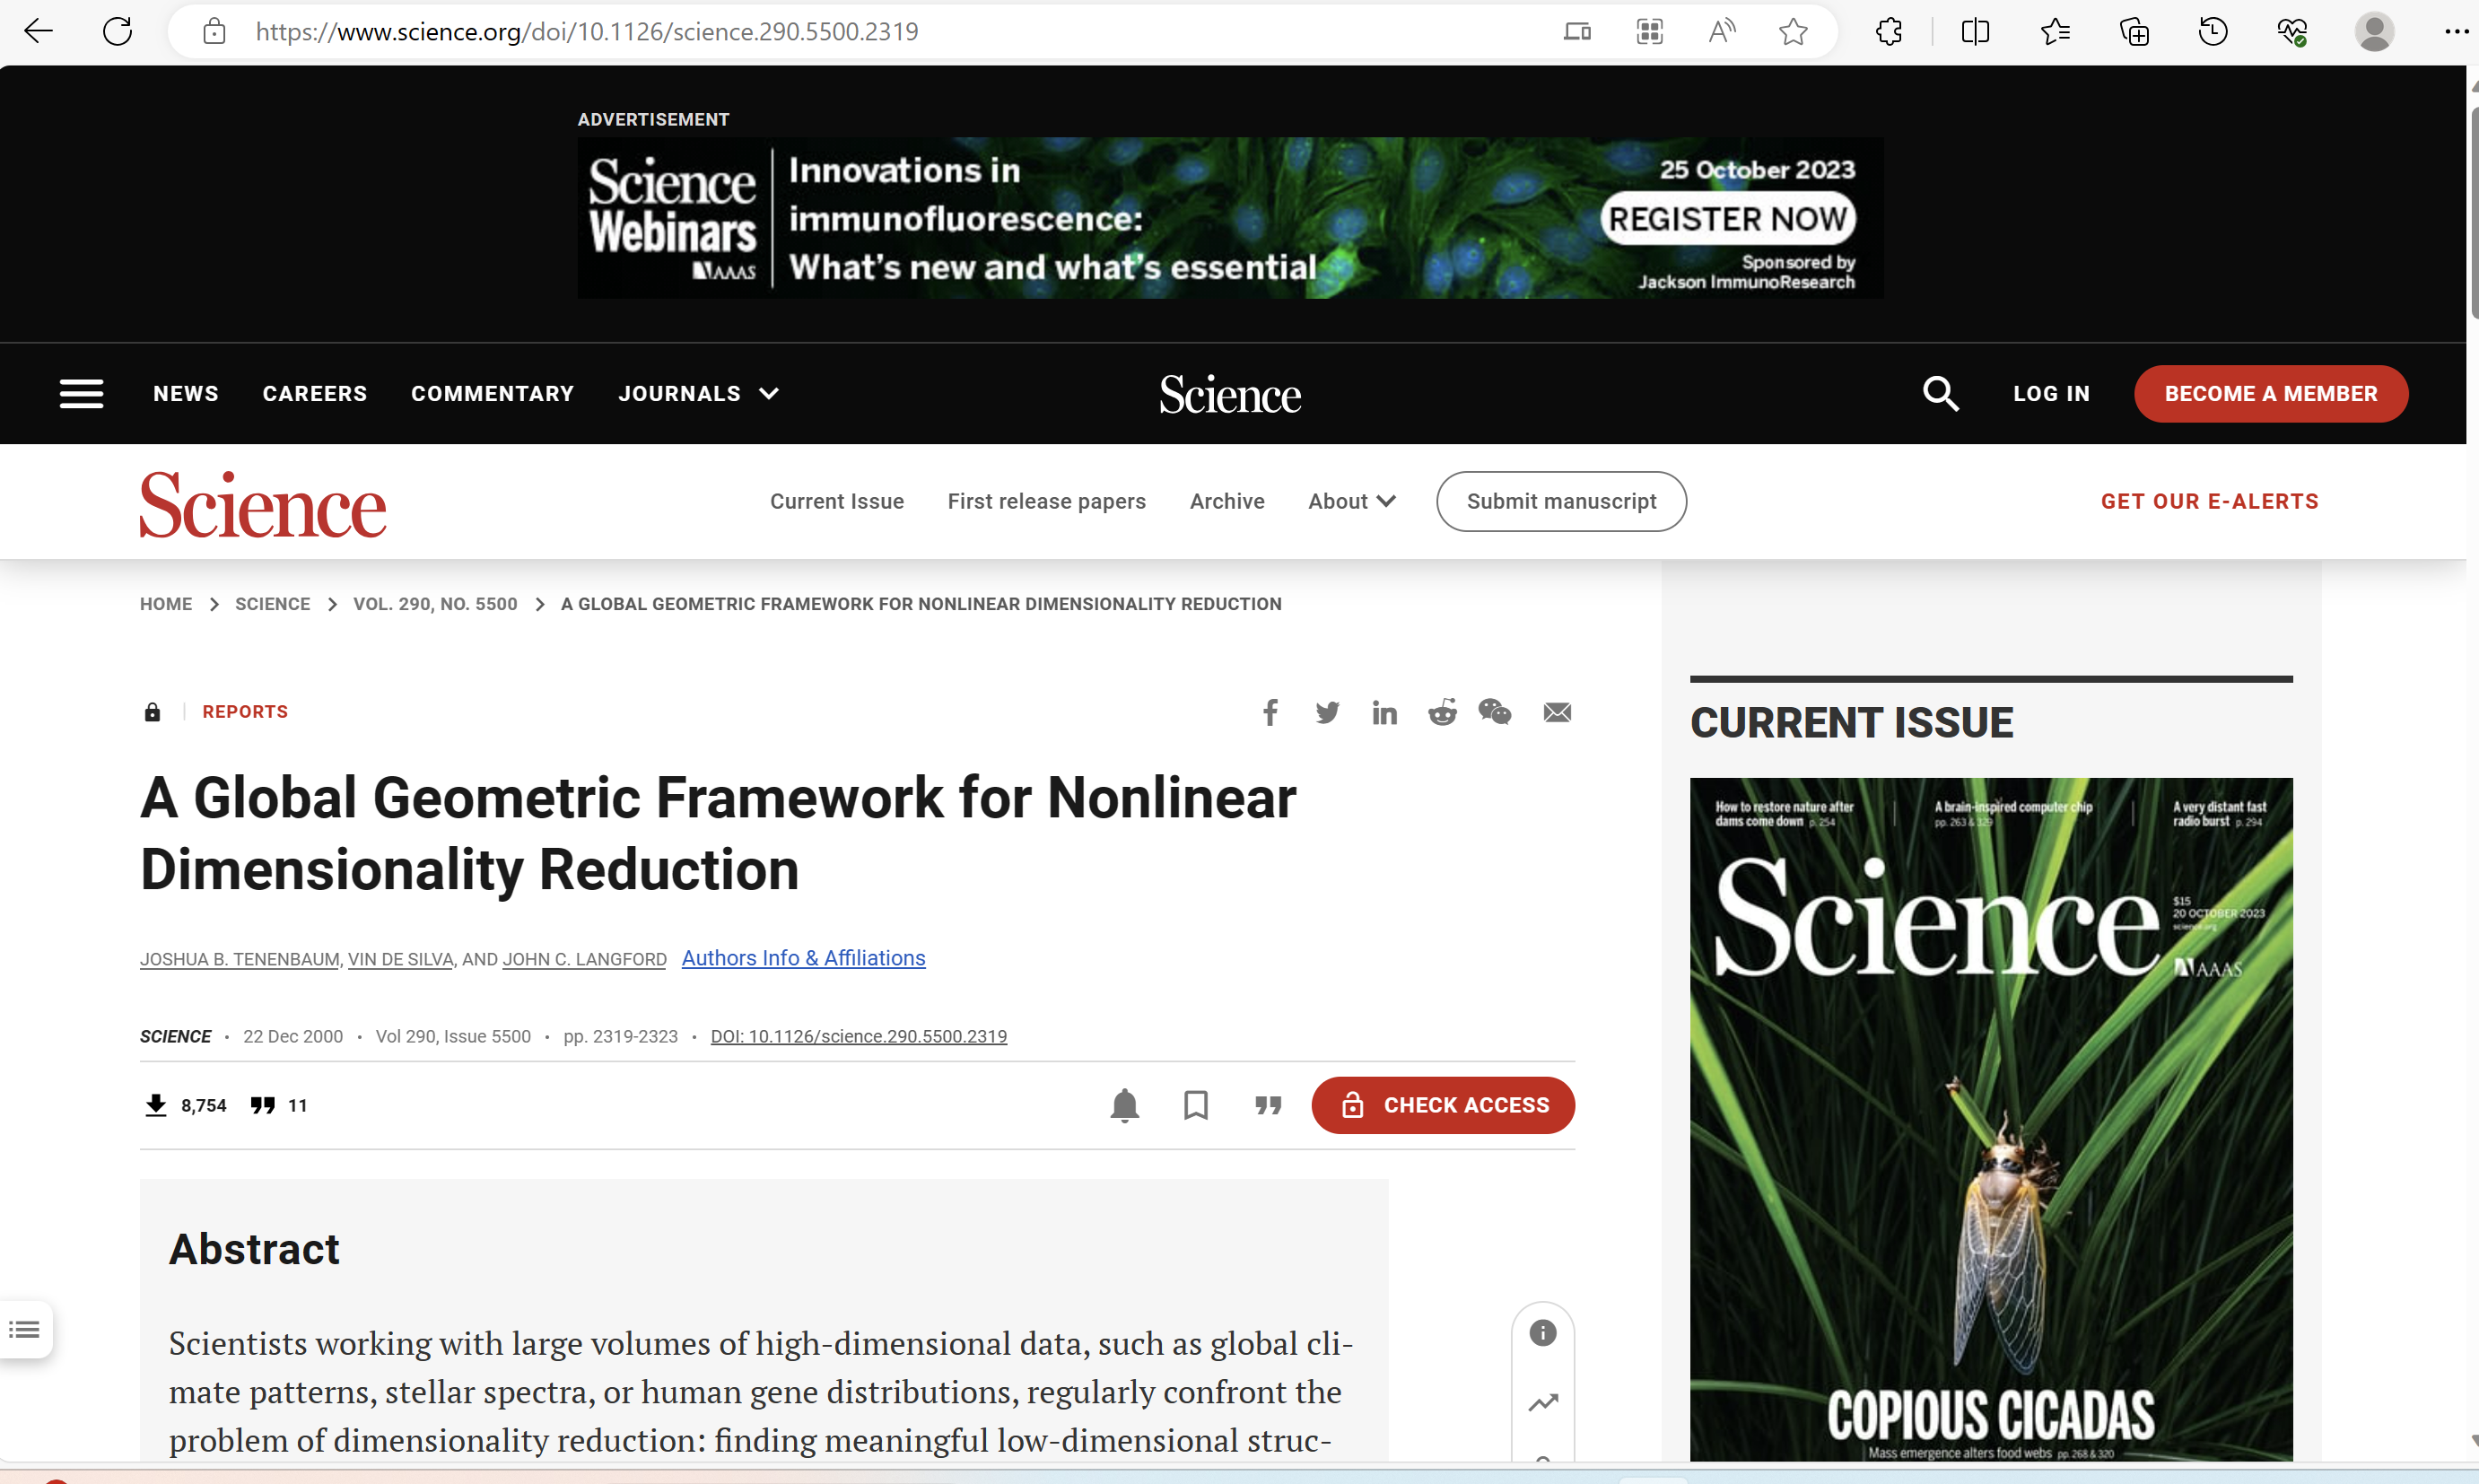

C:\Users\shown\AppData\Local\Temp\ipykernel_25812\1064547284.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral',10))#Spectral光谱图，S须大写


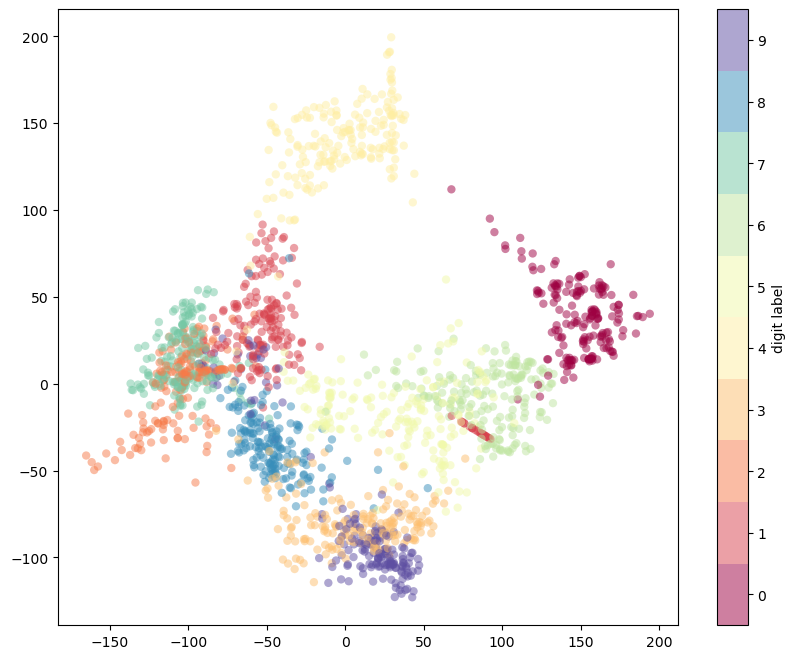

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,\
            cmap=plt.cm.get_cmap('Spectral',10))#Spectral光谱图，S须大写
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5)
plt.show()

### 3.1.3 数字分类

每个特征变量的条件概率均服从高斯分布，即

<div>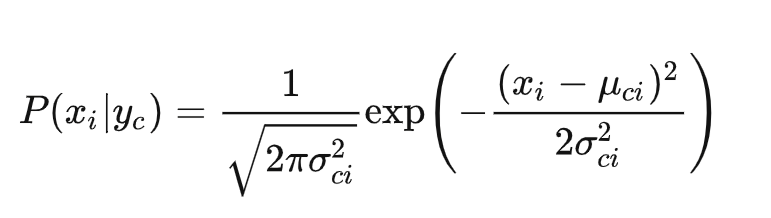</div>

<div>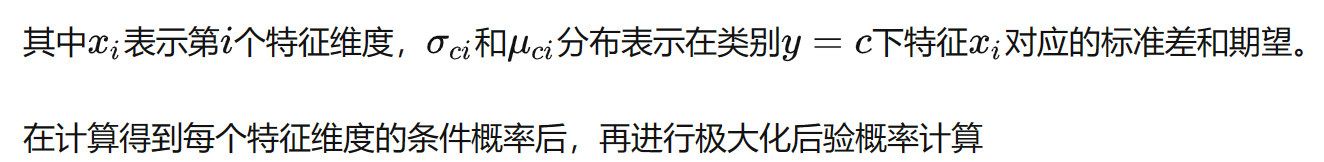</div>

<div>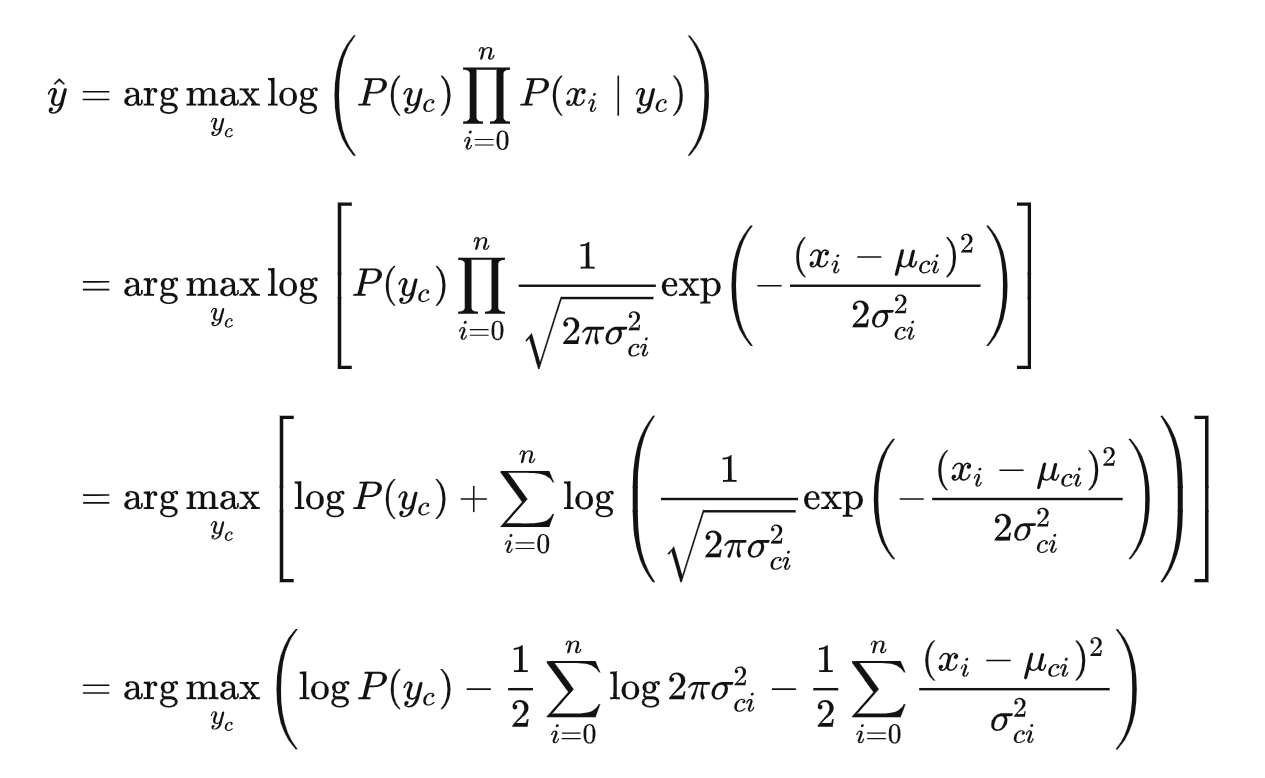</div>

<div>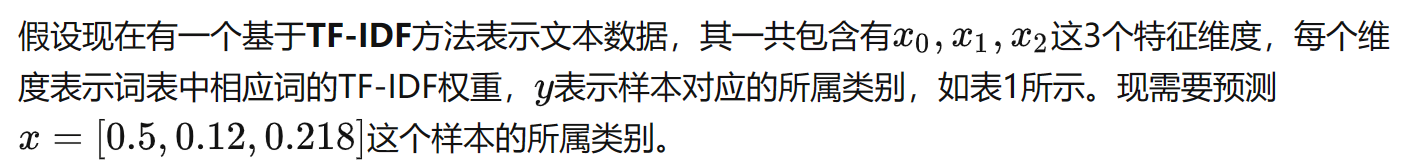</div>

In [ ]:
A,B,
P(A),p(B)
p(A|B)=P(A交B)/P(B),P(B|A)=p(A交B)/P(A)
P(A交B)=p(B)P(A|B)
P(B|A)=P(B)P(A|B)/P(A)


In [ ]:
P(y=0|x0,x1,x2)=P(y=0)*p(x0,x1,x2|y=0)/p(x0,x1,x2)
P(y=1|x0,x1,x2)=P(y=1)*p(x0,x1,x2|y=1)/p(x0,x1,x2)
P(y=2|x0,x1,x2)=P(y=2)*p(x0,x1,x2|y=2)/p(x0,x1,x2)
p(x0,x1,x2|y)=p(x0|y)*p(x1|y)*p(x2|y)*p(y)

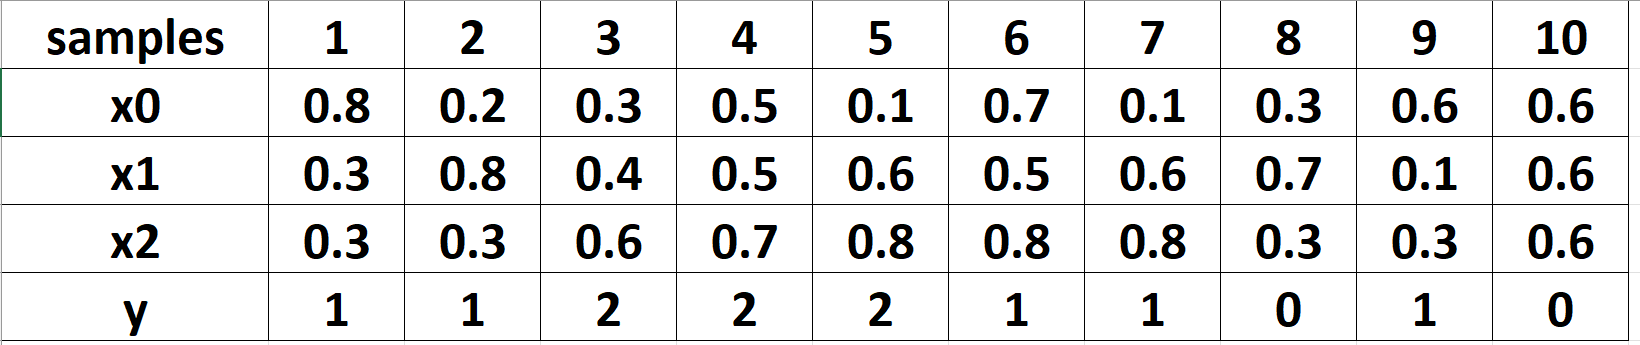

<div>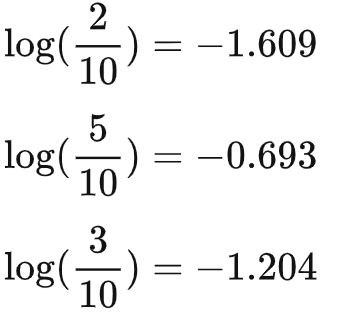</div>

<div>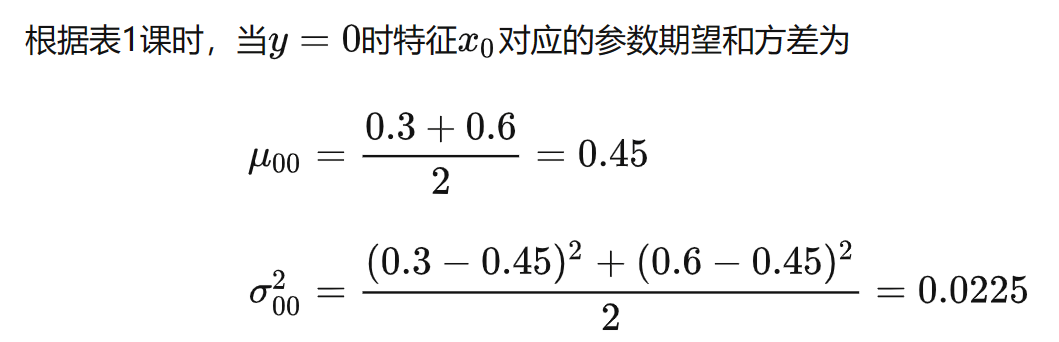</div>

<div>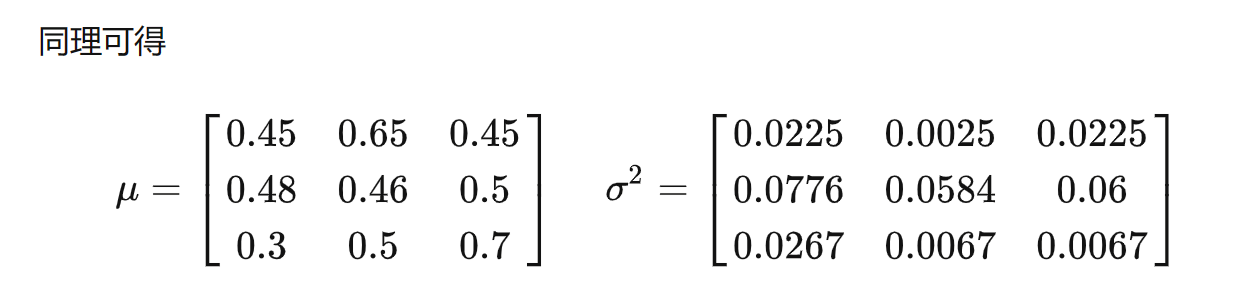</div>

<div>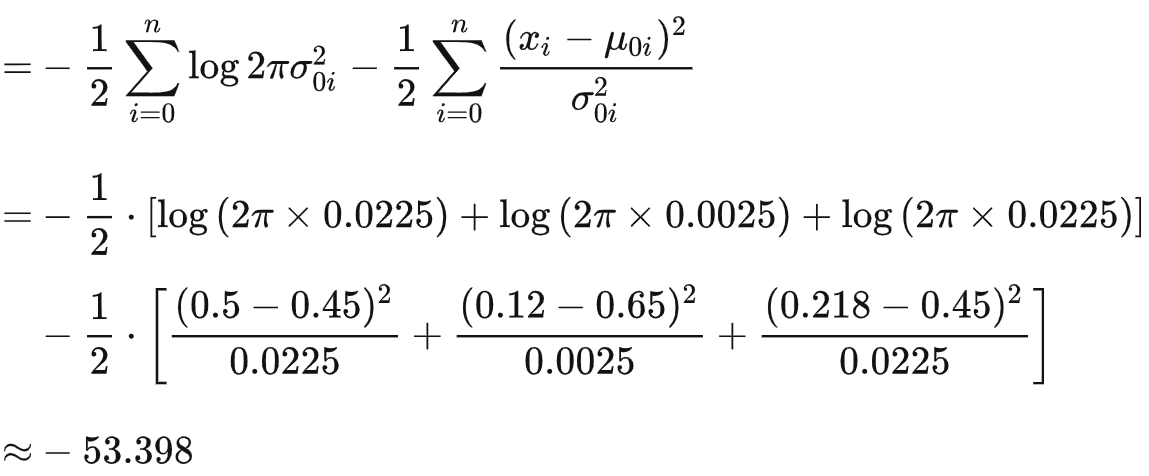</div>

y=1：-0.307<br>
y=2:-24.938

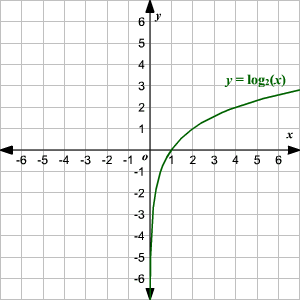

In [9]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB##朴素贝叶斯分类：朴素贝叶斯算法采用了一个“朴素”的假设，即各个特征之间是条件独立的，这意味着特征之间的存在与否不会相互影响。
model=GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)
y_model.shape

(450,)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

In [11]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

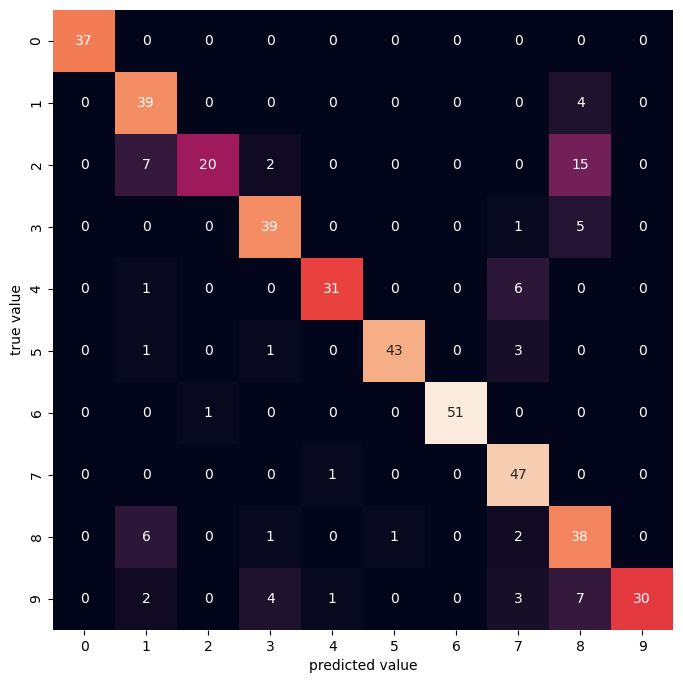

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(ytest,y_model)
plt.figure(figsize=(8,10))#不能在sns.heatmap()之后
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

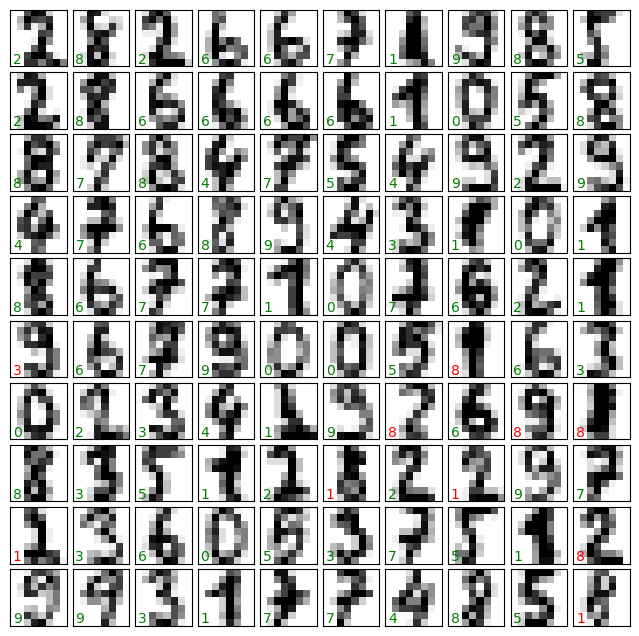

In [13]:
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
test_images=Xtest.reshape(-1,8,8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
        transform=ax.transAxes,
        color='green'if (ytest[i]==y_model[i]) else 'red')

导入模型/初始化模型/拟合数据/预测数据

# 3.2 Pytorch

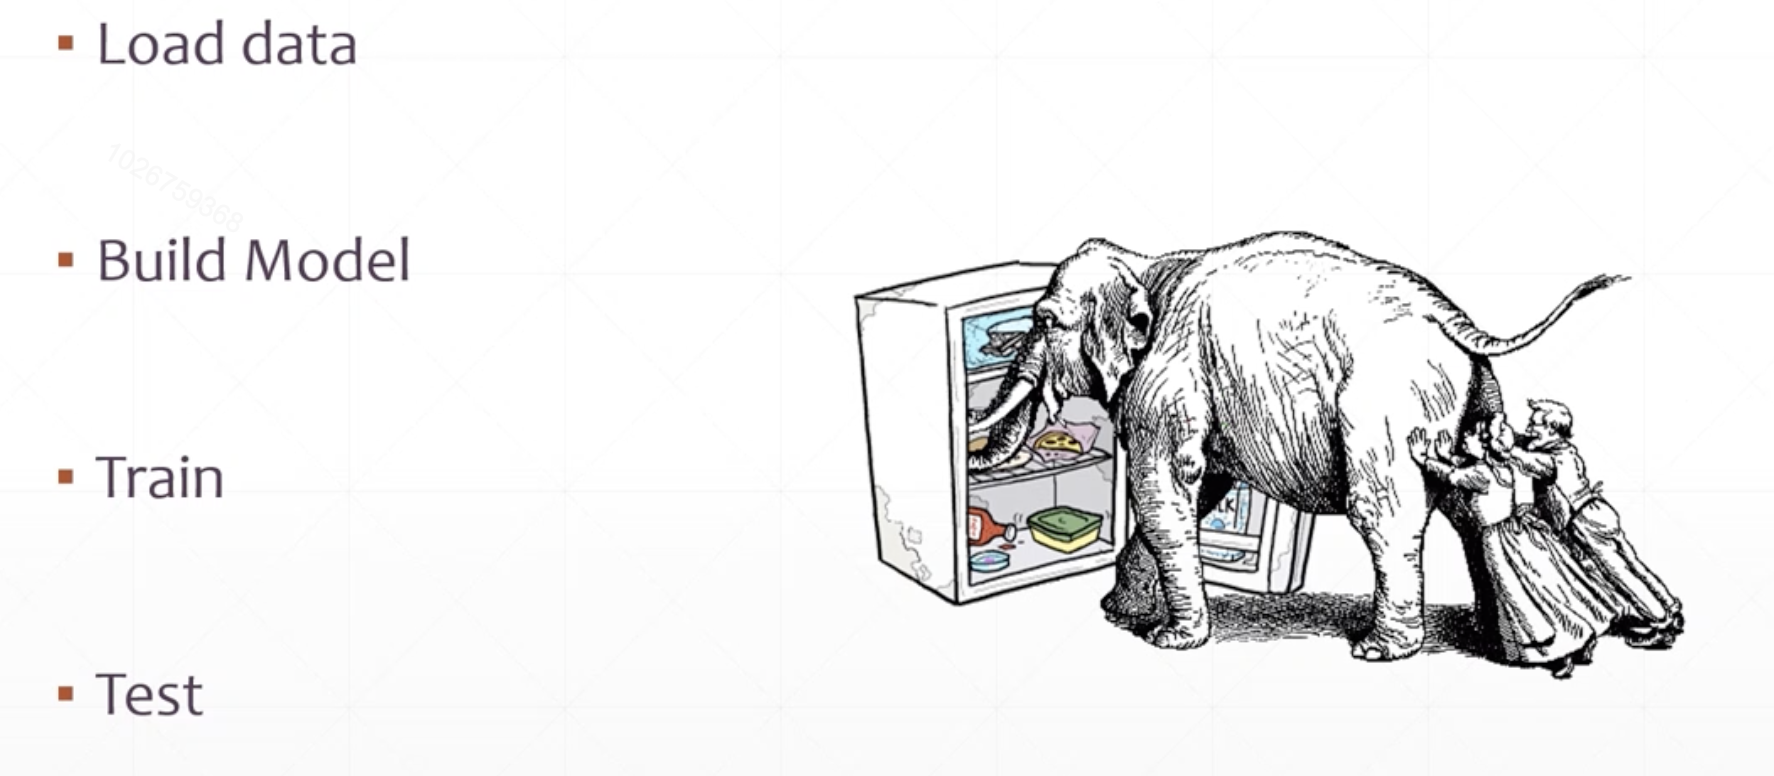

In [14]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import torchvision
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# from utils import plot_image,plot_curve,one_hot
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
#1.Load data

X=digits.data
# print('X.shape:',X.shape)
y=digits.target
# onehotencoder = OneHotEncoder() #不需要one-hot编码，这是由所选择的loss函数的输入要求决定的，如果需要编码可以采用这个步骤
# y = y.reshape(-1,1) 
# onehotencoder.fit(y)
# y = onehotencoder.transform(y).toarray()
# print(y.shape)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)
Xtrain= torch.from_numpy(Xtrain.astype(np.float32))
ytrain= torch.from_numpy(ytrain).long()
Xtest= torch.from_numpy(Xtest.astype(np.float32))
ytest= torch.from_numpy(ytest).long()
input_dim=Xtrain.shape[1]
# print('ytrain.shape:',ytrain.shape)
#batch_idx=400
#2.Build model

class NetDigit(nn.Module):
    def __init__(self,input_dim):
        super(NetDigit,self).__init__()
        self.fc1=nn.Linear(input_dim,256)
        self.fc2=nn.Linear(256,64)
        self.fc3=nn.Linear(64,10)
    def forward(self,x):
        x=F.relu(self.fc1(x))
#         print('x1:',x)
#         print('x1.shape:',x.shape)
        x=F.relu(self.fc2(x))
#         print('x2:',x)
#         print('x2.shape:',x.shape)
        x=F.softmax(self.fc3(x),dim=1)
#         print('x3:',x)
#         print('x3.shape:',x.shape)
        
        
        return x


netdigit=NetDigit(input_dim)
# optimizer=optim.SGD(netdigit.parameters(),lr=0.01,momentum=0.9)
optimizer = torch.optim.Adam(netdigit.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

#3.train data
for epoch in range(2000):
    #for batch_idx, (x,y) in enumerate(Xtrain):
    out=netdigit(Xtrain)
    loss=loss_fn(out,ytrain)
    optimizer.zero_grad()
    loss.backward()
    #w'=w-lr*grad
    optimizer.step()
    if epoch%10==0:
        print("every step:{},loss:{}".format(epoch,loss.item()))
    
        
    

every step:0,loss:2.30660343170166
every step:10,loss:1.784044861793518
every step:20,loss:1.673774242401123
every step:30,loss:1.6638678312301636
every step:40,loss:1.6612553596496582
every step:50,loss:1.6605079174041748
every step:60,loss:1.6588947772979736
every step:70,loss:1.6579829454421997
every step:80,loss:1.657395362854004
every step:90,loss:1.656969428062439
every step:100,loss:1.6566271781921387
every step:110,loss:1.6562681198120117
every step:120,loss:1.6557118892669678
every step:130,loss:1.6551553010940552
every step:140,loss:1.6547131538391113
every step:150,loss:1.6542011499404907
every step:160,loss:1.6521682739257812
every step:170,loss:1.6511372327804565
every step:180,loss:1.6505669355392456
every step:190,loss:1.580185055732727
every step:200,loss:1.5656723976135254
every step:210,loss:1.5642629861831665
every step:220,loss:1.5629907846450806
every step:230,loss:1.5624313354492188
every step:240,loss:1.562022089958191
every step:250,loss:1.5612245798110962
every

In [15]:
ytrain.shape

torch.Size([1347])

In [16]:
print(netdigit)

NetDigit(
  (fc1): Linear(in_features=64, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
#4.test
torch.save(netdigit, 'netdigit.pkl')  # save entire net
#torch.save(net.state_dict(), 'net_params.pkl')   # save only the parameters
net_iris = torch.load('netdigit.pkl')  #加载神经网络b
y_pred=net_iris(Xtest)
print(y_pred.shape)

torch.Size([450, 10])


In [18]:
y_pred=y_pred.detach().numpy()#去掉反向传播，成为彻底的numpy数据类型
print ("The accuracy is", accuracy_score(ytest, np.argmax(y_pred, axis=1)))

The accuracy is 0.98


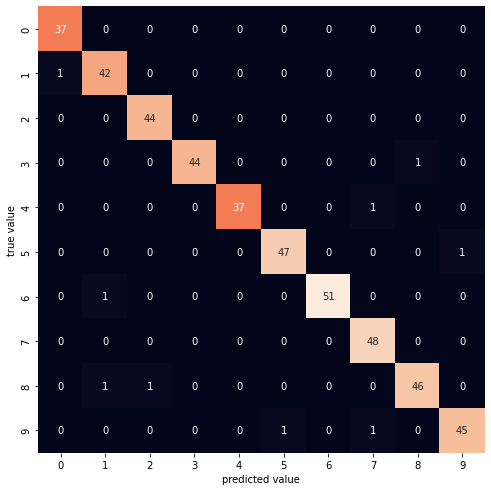

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(ytest,np.argmax(y_pred, axis=1))
plt.figure(figsize=(8,10))#不能在sns.heatmap()之后
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

### 准确性、速度（复杂度）、强壮性、规模化、可解释性

# 3.3 决策树与随机森林

<div>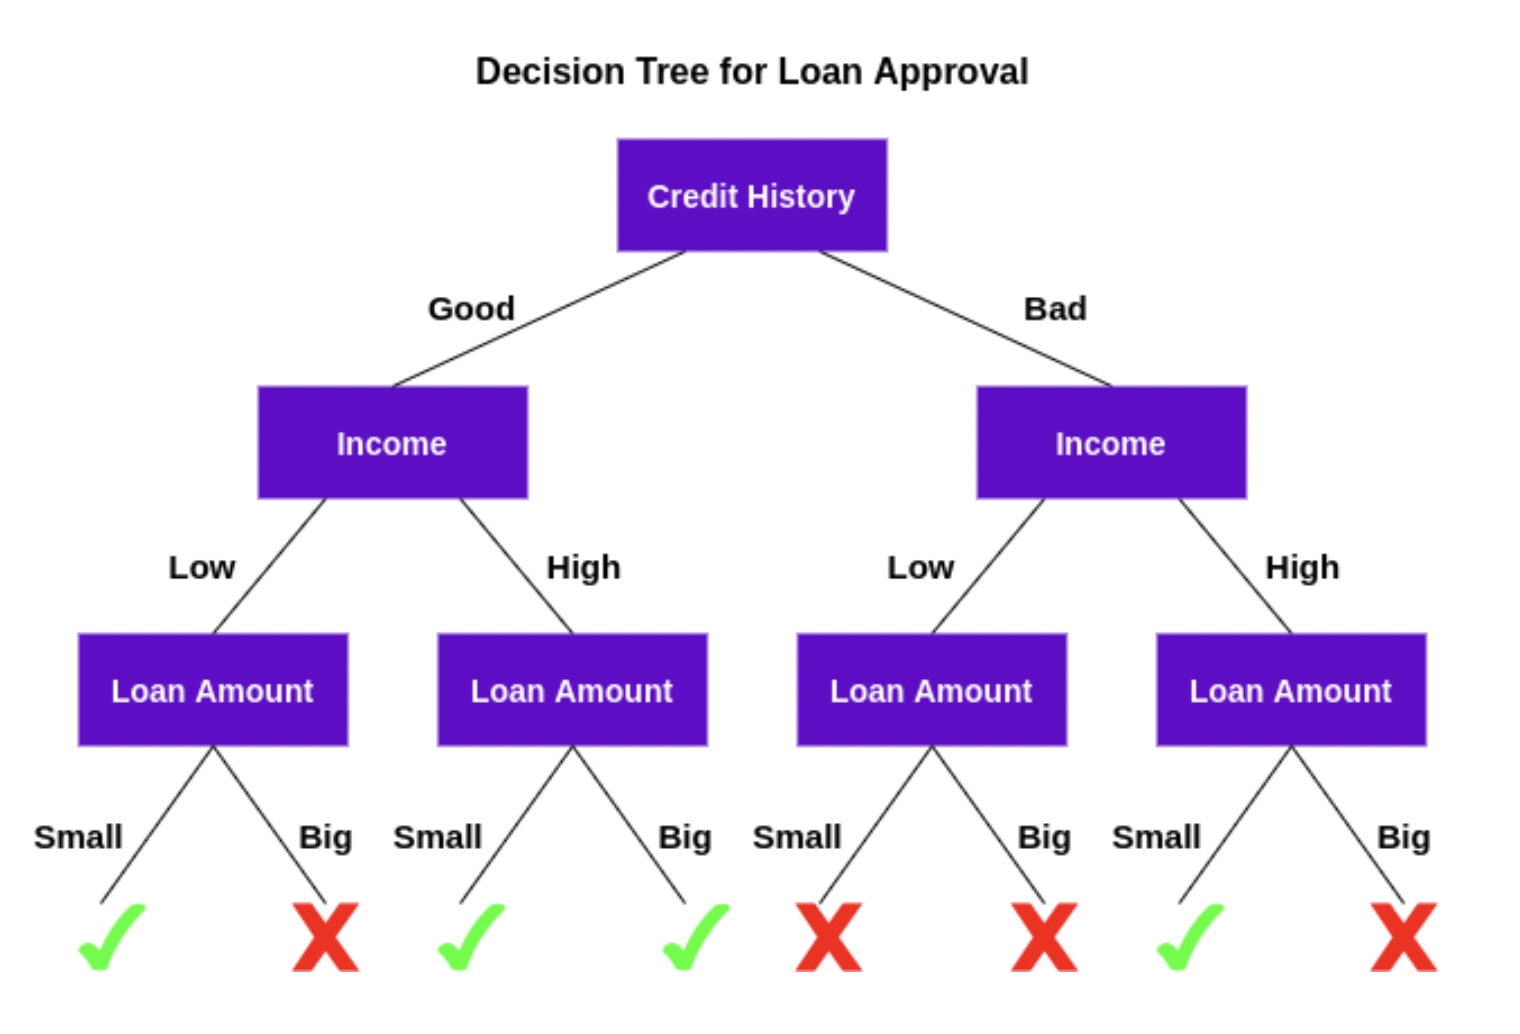</div>

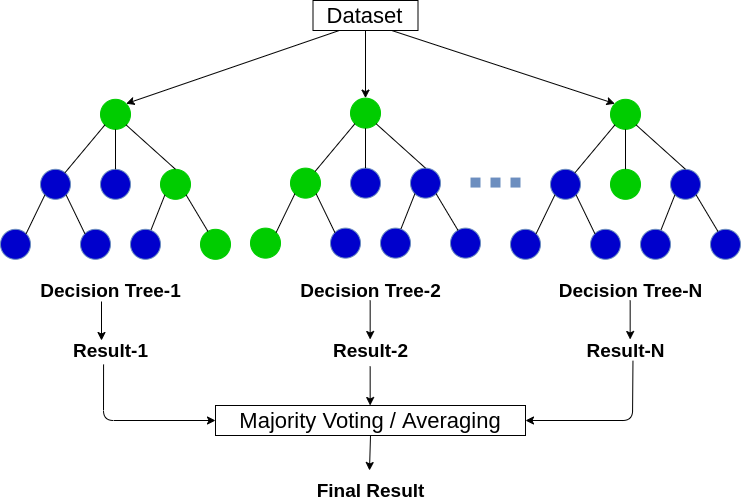

## 熵 : p(x)*log(1/p(x))

<div>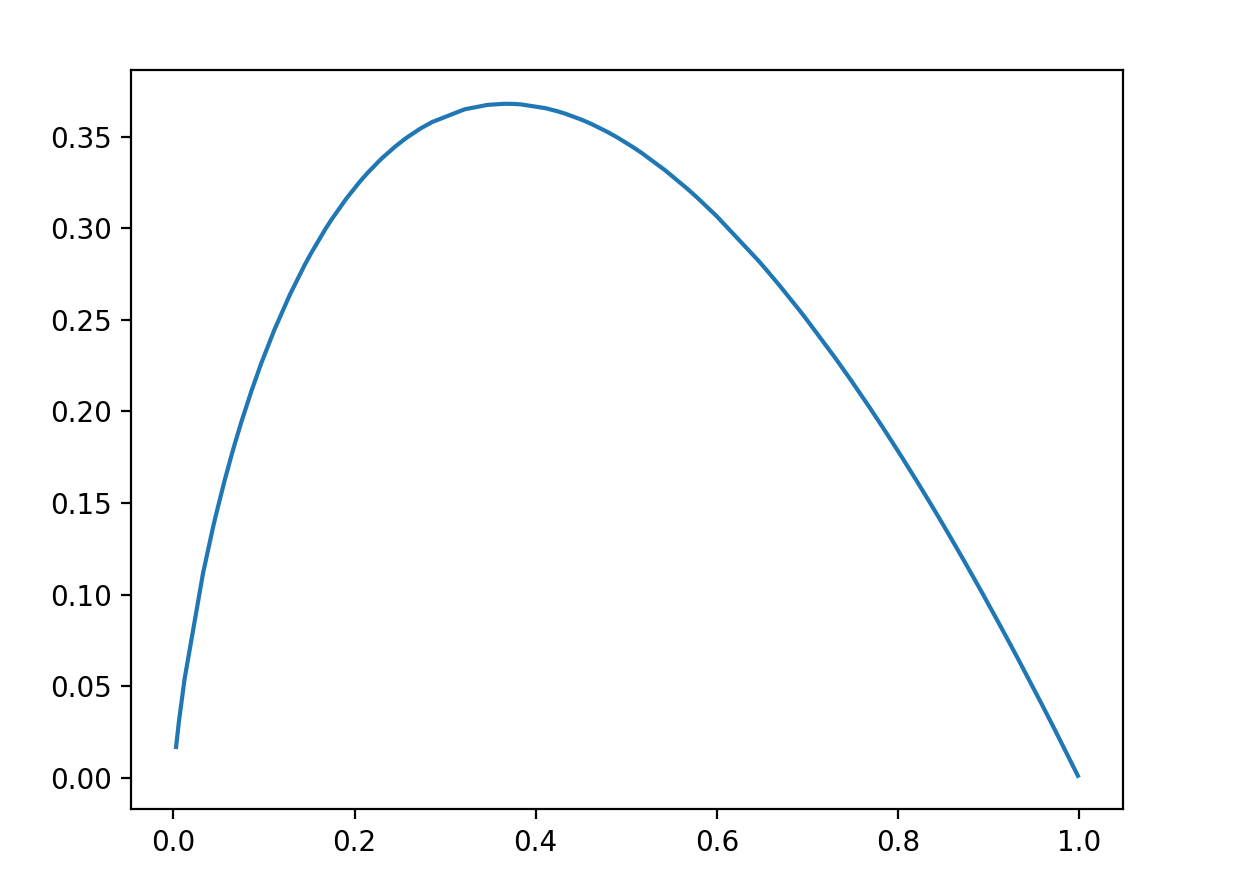</div>

<div>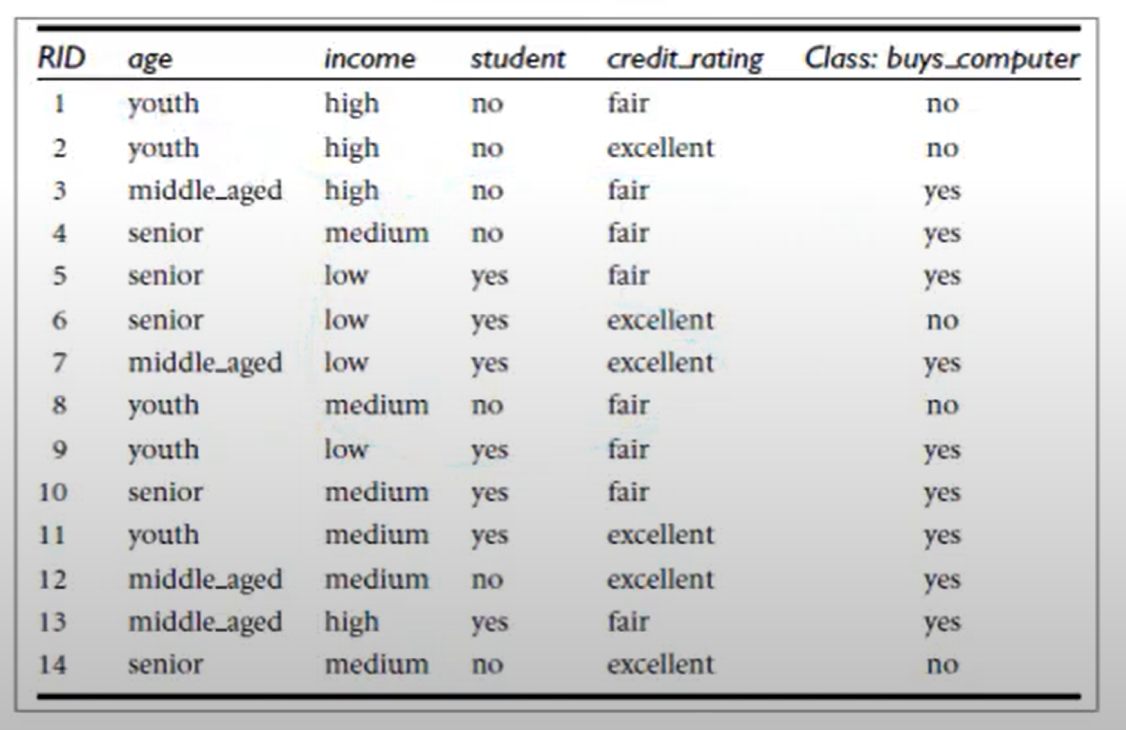</div>

<div>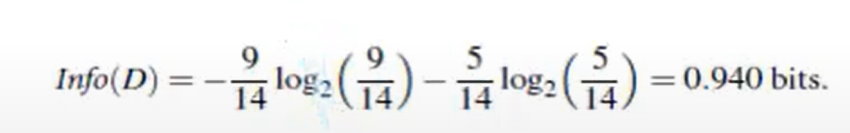</div>


<div>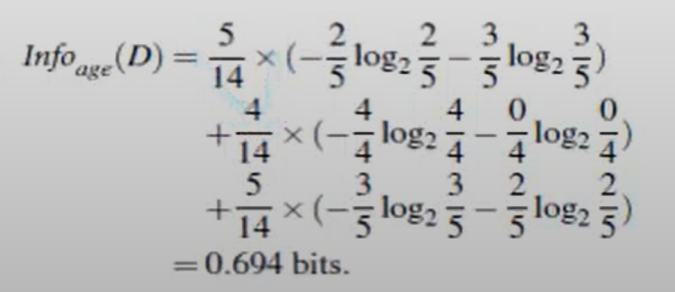</div>

<div>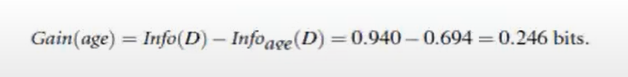</div>

<div>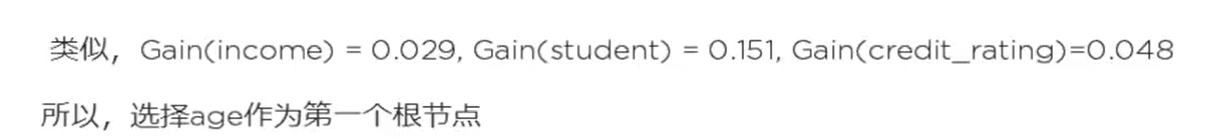</div>

<div>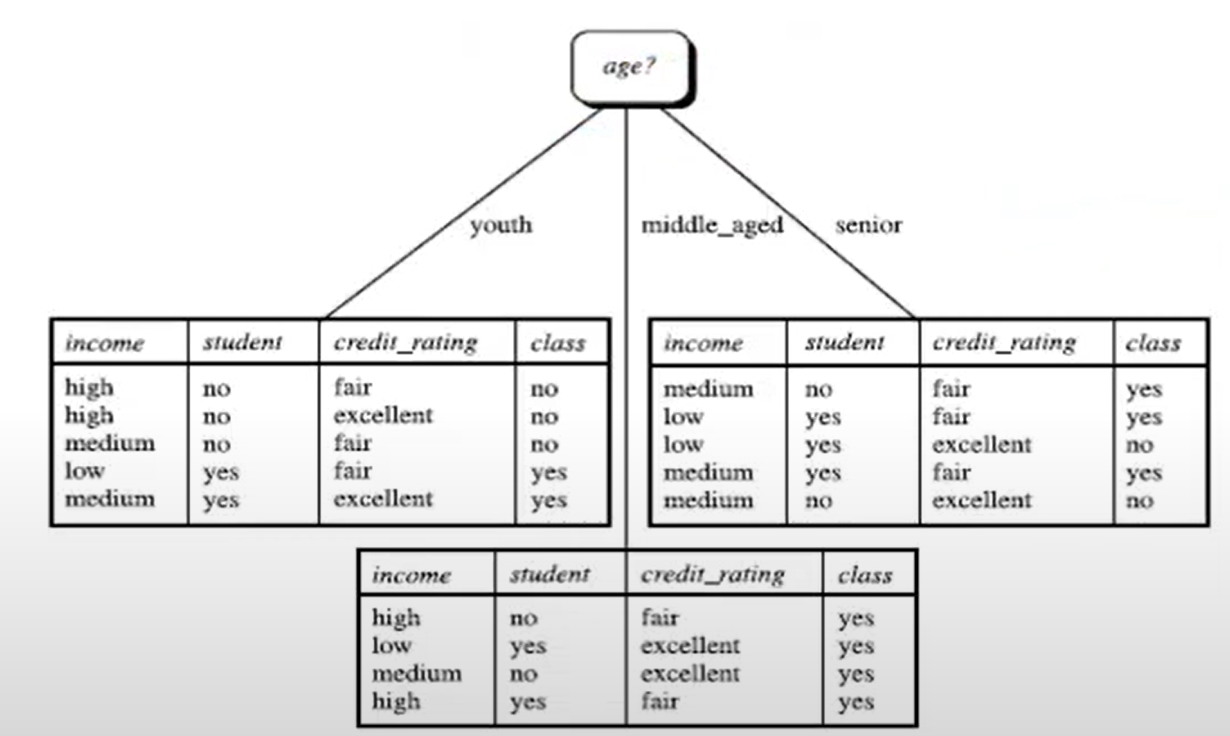</div>

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
Xtrain,Xtest,ytrain,ytest=train_test_split(digits.data,digits.target,random_state=0)
model=RandomForestClassifier(n_estimators=100)#森林中决策树的个数
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.96      0.96      0.96        48
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.96      0.98      0.97        47
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [20]:
model=RandomForestClassifier(n_estimators=1000)#森林中决策树的个数
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)
print(metrics.classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



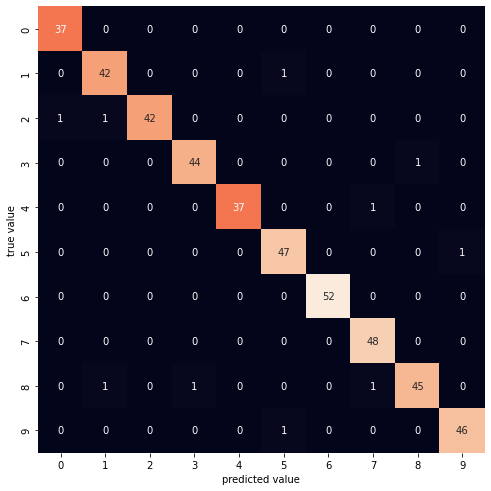

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(ytest,ypred)
plt.figure(figsize=(8,10))#不能在sns.heatmap()之后
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()